In [1]:
# imports
from sqlalchemy import create_engine, Column, String, Integer, Float, Date, MetaData, Table, type_coerce
from sqlalchemy.orm import mapper, create_session
import csv
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
import numbers
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import datetime as dt
import os
import re
from mpl_toolkits.basemap import Basemap
import pandas as pd
%matplotlib inline

In [2]:
# definitions
basepath='/ocean/eolson/MEOPAR/obs/'
hdir='ECRivers'
dbname='ECRiversDB'
dbpath=os.path.join(basepath,hdir,dbname)
print(dbpath)

/ocean/eolson/MEOPAR/obs/ECRivers/ECRiversDB


In [3]:

engine = create_engine('sqlite:///'+dbpath+'.sqlite')


In [4]:
Base = automap_base()
# reflect the tables in salish.sqlite:
Base.prepare(engine, reflect=True)
# mapped classes have been created
Profs=Base.classes.profiles
session = create_session(bind = engine, autocommit = False, autoflush = True)


In [5]:
# get list of data types:
data=session.query(Profs.variable_name).group_by(Profs.variable_name).all()
for row in data:
    print(row)

('ADSORBABLE ORGANIC HALIDE - AOX',)
('ALKALINITY GRAN CACO3',)
('ALKALINITY PHENOLPHTHALEIN CACO3',)
('ALKALINITY TOTAL CACO3',)
('ALUMINUM DISSOLVED',)
('ALUMINUM EXTRACTABLE',)
('ALUMINUM TOTAL',)
('ALUMINUM_27 TOTAL RECOVERABLE - AL',)
('AMMONIA DISSOLVED',)
('ANTIMONY DISSOLVED',)
('ANTIMONY EXTRACTABLE',)
('ANTIMONY TOTAL',)
('ARSENIC DISSOLVED',)
('ARSENIC EXTRACTABLE',)
('ARSENIC TOTAL',)
('BARIUM DISSOLVED',)
('BARIUM EXTRACTABLE',)
('BARIUM TOTAL',)
('BERYLLIUM DISSOLVED',)
('BERYLLIUM EXTRACTABLE',)
('BERYLLIUM TOTAL',)
('BICARBONATE (CALCD.)',)
('BISMUTH DISSOLVED',)
('BISMUTH EXTRACTABLE',)
('BISMUTH TOTAL',)
('BORON DISSOLVED',)
('BORON EXTRACTABLE',)
('BORON TOTAL',)
('BROMIDE DISSOLVED',)
('CADMIUM DISSOLVED',)
('CADMIUM EXTRACTABLE',)
('CADMIUM TOTAL',)
('CALCIUM DISSOLVED',)
('CALCIUM EXTRACTABLE',)
('CALCIUM TOTAL',)
('CARBON DISSOLVED INORGANIC',)
('CARBON DISSOLVED ORGANIC',)
('CARBON TOTAL INORGANIC',)
('CARBON TOTAL ORGANIC',)
('CARBONATE (CALCD.)',)
('CERIUM DIS

52.07197 -123.26137 Chilcotin River upstream of Christie Road Bridge 14946
49.167 -123.035 Fraser River (Main Arm) at Gravesend Reach - Buoy 6467
54.07706 -121.8484 Fraser River at Hansard 14223
53.02955 -119.23201 Fraser River at Hargreaves Bridge 61
49.38722 -121.4508 Fraser River at Hope 30325
52.52964 -122.44228 Fraser River at Marguerite 26068
52.9878 -119.0101 Fraser River at Red Pass 32454
52.4033 -121.4342 Horsefly River above Quesnel Lake 12018
53.92722 -122.765 Nechako River at Prince George 28017
50.425 -121.31639 Nicola River near mouth at Thompson River 6686
49.24211 -122.5961 North Alouette River at 132nd Ave and Edge Street 18431
50.69139 -119.32889 Salmon River at Highway 1 Bridge 27814
50.68484 -119.06999 Shuswap River upstream Mara Lake 4405
50.68056 -120.32444 South Thompson River at Kamloops 35
50.42083 -121.34139 Thompson River at Spences Bridge 28755


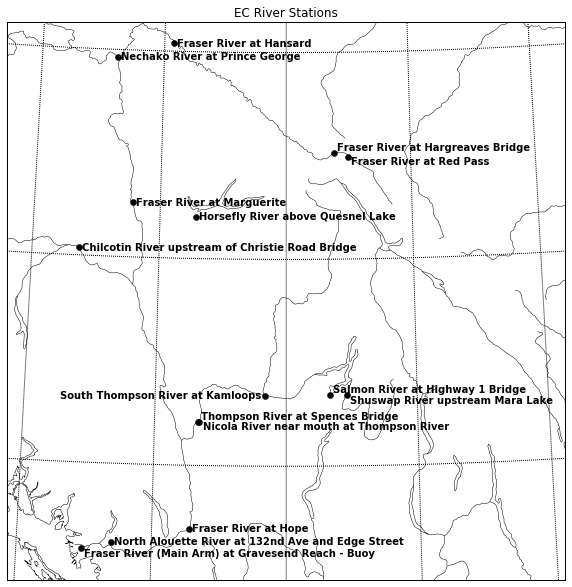

In [6]:
# get unique stations and map them

# map:
width = 600000; lon_0 = -120; lat_0 = 51.6
plt.figure(figsize=(10,10))
m = Basemap(width=width,height=width,projection='aeqd', resolution='h',
            lat_0=lat_0,lon_0=lon_0)
# fill background.
m.drawmapboundary()
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.drawrivers()
#m.shadedrelief()
# 20 degree graticule.
m.drawparallels(np.arange(40,60,2))
m.drawmeridians(np.arange(-130,-110,2))
plt.title('EC River Stations')

#data:
data=session.query(Profs.latitude, Profs.longitude, Profs.station_name, func.count()).\
            group_by(Profs.station_name).all()
    
# map stations:
for lat, lon, name, num in data:
    if lon>0:
        lon=-lon
    print(lat, lon, name, num)
    xpt, ypt = m(lon, lat)
    xpt2, ypt2 = m(lon+.05, lat)
    if re.search('Red Pass',name):
        xpt2, ypt2 = m(lon+.05, lat-.05)
    elif re.search('Hargreaves',name):
        xpt2, ypt2 = m(lon+.05, lat+.05)
    elif re.search('Shuswap',name):
        xpt2, ypt2 = m(lon+.05, lat-.05)
    elif re.search('Salmon',name):
        xpt2, ypt2 = m(lon+.05, lat+.05)
    elif re.search('Spences Bridge',name):
        xpt2, ypt2 = m(lon+.05, lat+.05)
    elif re.search('Nicola River',name):
        xpt2, ypt2 = m(lon+.05, lat-.05)
    elif re.search('Main Arm',name):
        xpt2, ypt2 = m(lon+.05, lat-.05)
    m.plot([xpt],[ypt],'ko')
    if re.search('South Thompson',name):
        xpt2, ypt2 = m(lon-.05, lat)
        plt.text(xpt2,ypt2,name,fontsize=10,fontweight='bold',
                    ha='right',va='center',color='k')
    else:
        plt.text(xpt2,ypt2,name,fontsize=10,fontweight='bold',
                    ha='left',va='center',color='k')
#xpt, ypt = m(-123.26137, 52.07197)
#xpt2, ypt2 = m(lon_0+.04, lat_0)
#m.plot([xpt],[ypt],'ko')
#plt.text(xpt2,ypt2,'station',fontsize=12,fontweight='bold',
#                    ha='left',va='center',color='k')

In [7]:
data=session.query(Profs.latitude, Profs.longitude, Profs.station_name, func.count()).\
            filter(or_(
                    Profs.station_name.like('%Hope%'),
                    Profs.station_name.like('%132nd Ave and Edge Street%'),
                    Profs.station_name.like('%Gravesend%'))).\
            group_by(Profs.station_name).all()
for row in data:
    print(row)

(49.167, -123.035, 'Fraser River (Main Arm) at Gravesend Reach - Buoy', 6467)
(49.38722, -121.4508, 'Fraser River at Hope', 30325)
(49.24211, -122.5961, 'North Alouette River at 132nd Ave and Edge Street', 18431)


In [8]:
data=session.query(Profs.station_name, Profs.unit_code, func.count()).\
            filter(Profs.variable_name=='AMMONIA DISSOLVED').group_by(Profs.unit_code,Profs.station_name).all()
for row in data:
    print(row)

('Chilcotin River upstream of Christie Road Bridge', 'MG/L', 189)
('Fraser River (Main Arm) at Gravesend Reach - Buoy', 'MG/L', 48)
('Fraser River at Hansard', 'MG/L', 3)
('Fraser River at Hope', 'MG/L', 4)
('Fraser River at Marguerite', 'MG/L', 7)
('Fraser River at Red Pass', 'MG/L', 1)
('Horsefly River above Quesnel Lake', 'MG/L', 168)
('Nechako River at Prince George', 'MG/L', 3)
('Nicola River near mouth at Thompson River', 'MG/L', 145)
('North Alouette River at 132nd Ave and Edge Street', 'MG/L', 3)
('Salmon River at Highway 1 Bridge', 'MG/L', 301)
('Shuswap River upstream Mara Lake', 'MG/L', 76)
('Thompson River at Spences Bridge', 'MG/L', 60)
('Chilcotin River upstream of Christie Road Bridge', 'UG/G', 1)
('Nicola River near mouth at Thompson River', 'UG/G', 1)


In [9]:
data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(and_(
                Profs.variable_name=='AMMONIA DISSOLVED',
                Profs.station_name=='Fraser River (Main Arm) at Gravesend Reach - Buoy')).all()

In [10]:
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)

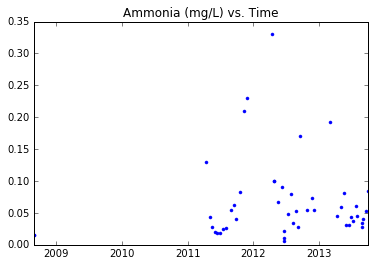

In [11]:
plt.plot(date, Amm, 'b.')
plt.title('Ammonia (mg/L) vs. Time')

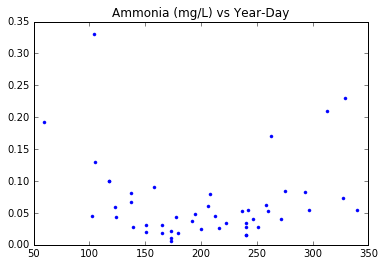

In [12]:
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.title('Ammonia (mg/L) vs Year-Day')

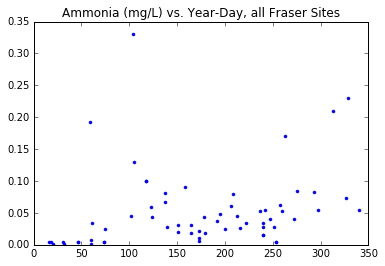

In [13]:
data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(Profs.variable_name=='AMMONIA DISSOLVED').\
            filter(Profs.station_name.like('Fraser River%')).all()
Y=[]; M=[]; D=[]; Amm=[]; date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.title('Ammonia (mg/L) vs. Year-Day, all Fraser Sites')

3.29305606549 uM


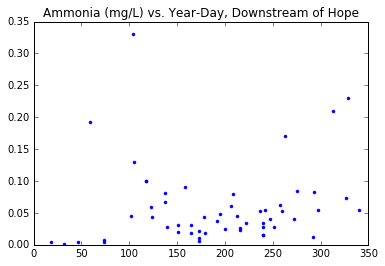

In [14]:

data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(Profs.variable_name=='AMMONIA DISSOLVED').\
            filter(or_(
                    Profs.station_name.like('%Hope%'),
                    Profs.station_name.like('%132nd Ave and Edge Street%'),
                    Profs.station_name.like('%Gravesend%'))).all()
Y=[]; M=[]; D=[]; Amm=[]; date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.title('Ammonia (mg/L) vs. Year-Day, Downstream of Hope')
meanAmm_uM=np.mean(Amm)/18.038508*10**3 # divide by molecular weight of NH4 and convert mmol to umol
print(meanAmm_uM, 'uM')

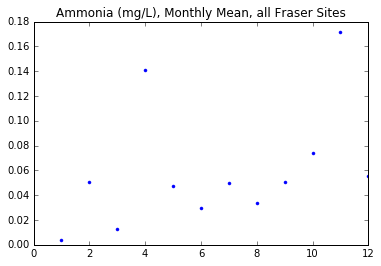

In [15]:
data=session.query(Profs.Month, func.avg(Profs.value)).\
            filter(Profs.variable_name=='AMMONIA DISSOLVED').\
            filter(Profs.station_name.like('Fraser River%')).group_by(Profs.Month).all()
M=[]
Amm=[]
for M0, Amm0 in data:
    M.append(M0)
    Amm.append(Amm0)
M=np.array(M)
Amm=np.array(Amm)
plt.plot(M,Amm,'b.')
plt.title('Ammonia (mg/L), Monthly Mean, all Fraser Sites')

# NITRATE+NITRITE

In [16]:
data=session.query(Profs.variable_name, Profs.station_name, Profs.unit_code, func.count()).\
            filter(or_(Profs.variable_name=='NITROGEN DISSOLVED NITRATE',
                      Profs.variable_name=='NITROGEN DISSOLVED NO3 & NO2')).\
            group_by(Profs.variable_name,Profs.unit_code,Profs.station_name).all()
for row in data:
    print(row)

('NITROGEN DISSOLVED NITRATE', 'Chilcotin River upstream of Christie Road Bridge', 'MG/L', 104)
('NITROGEN DISSOLVED NITRATE', 'Fraser River (Main Arm) at Gravesend Reach - Buoy', 'MG/L', 75)
('NITROGEN DISSOLVED NITRATE', 'Fraser River at Hansard', 'MG/L', 93)
('NITROGEN DISSOLVED NITRATE', 'Fraser River at Hargreaves Bridge', 'MG/L', 1)
('NITROGEN DISSOLVED NITRATE', 'Fraser River at Hope', 'MG/L', 236)
('NITROGEN DISSOLVED NITRATE', 'Fraser River at Marguerite', 'MG/L', 222)
('NITROGEN DISSOLVED NITRATE', 'Fraser River at Red Pass', 'MG/L', 219)
('NITROGEN DISSOLVED NITRATE', 'Horsefly River above Quesnel Lake', 'MG/L', 181)
('NITROGEN DISSOLVED NITRATE', 'Nechako River at Prince George', 'MG/L', 228)
('NITROGEN DISSOLVED NITRATE', 'Nicola River near mouth at Thompson River', 'MG/L', 63)
('NITROGEN DISSOLVED NITRATE', 'North Alouette River at 132nd Ave and Edge Street', 'MG/L', 128)
('NITROGEN DISSOLVED NITRATE', 'Salmon River at Highway 1 Bridge', 'MG/L', 219)
('NITROGEN DISSOLVED 

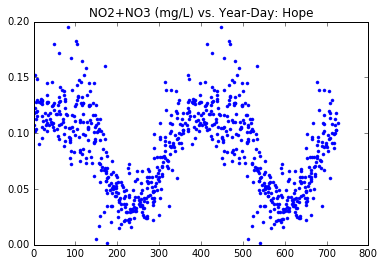

In [17]:
# NO2+NO3 at Hope
data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(and_(
                Profs.variable_name=='NITROGEN DISSOLVED NO3 & NO2',
                Profs.station_name=='Fraser River at Hope')).all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.plot(YD+365.0,Amm,'b.')
plt.title('NO2+NO3 (mg/L) vs. Year-Day: Hope')

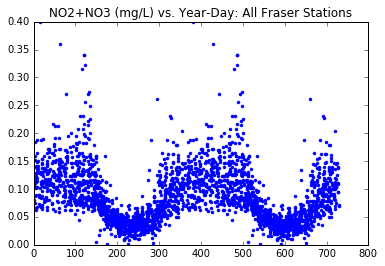

In [18]:
## NO2+NO3, all Fraser Stations:
data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(and_(
                Profs.value<2.5,#exlude 2 high points
                Profs.variable_name=='NITROGEN DISSOLVED NO3 & NO2',
                Profs.station_name.like('Fraser River%'))).all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.plot(YD+365.0,Amm,'b.')
plt.title('NO2+NO3 (mg/L) vs. Year-Day: All Fraser Stations')

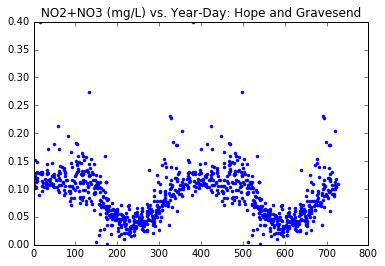

In [19]:
## NO2+NO3, all Fraser Stations:
data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(and_(
                Profs.value<2.5,#exlude 2 high points
                Profs.variable_name=='NITROGEN DISSOLVED NO3 & NO2',
                or_(
                    Profs.station_name.like('%Hope%'),
                    Profs.station_name.like('%Gravesend%')))).all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.plot(YD+365.0,Amm,'b.')
plt.title('NO2+NO3 (mg/L) vs. Year-Day: Hope and Gravesend')



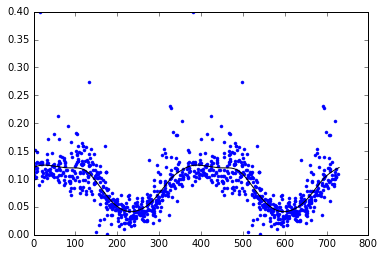

In [20]:
allt=np.arange(0,366)
fil=np.empty(np.size(allt))
L=50
s=L/2.355
for t in allt:
    diff=[min(abs(x-t),abs(x-t+365), abs(x-t-365)) for x in YD]
    weight=[np.exp(-.5*x**2/s**2) if x <= 3*L else 0.0 for x in diff]
    #weight=[np.exp(-.5*x**2/s**2) for x in diff]
    fil[t]=np.sum(weight*Amm)/np.sum(weight)
plt.plot(YD,Amm,'b.')
plt.plot(YD+365.0,Amm,'b.')
plt.plot(allt,fil,'k-')
plt.plot(allt+365,fil,'k-')
#plt.plot(YD,weight,'*')

# Dissolved Silica

In [21]:
data=session.query(Profs.latitude, Profs.longitude, Profs.variable_name, Profs.station_name, Profs.unit_code, func.count()).\
            filter(or_(Profs.variable_name=='SILICA DISSOLVED',
                      Profs.variable_name=='SILICON DISSOLVED')).\
            group_by(Profs.variable_name,Profs.unit_code,Profs.station_name).all()
for row in data:
    print(row)

(54.07706, -121.8484, 'SILICA DISSOLVED', 'Fraser River at Hansard', 'MG/L', 191)
(49.38722, -121.4508, 'SILICA DISSOLVED', 'Fraser River at Hope', 'MG/L', 220)
(52.52964, -122.44228, 'SILICA DISSOLVED', 'Fraser River at Marguerite', 'MG/L', 208)
(52.9878, -119.0101, 'SILICA DISSOLVED', 'Fraser River at Red Pass', 'MG/L', 240)
(53.92722, -122.765, 'SILICA DISSOLVED', 'Nechako River at Prince George', 'MG/L', 204)
(50.69139, -119.32889, 'SILICA DISSOLVED', 'Salmon River at Highway 1 Bridge', 'MG/L', 238)
(50.68056, -120.32444, 'SILICA DISSOLVED', 'South Thompson River at Kamloops', 'MG/L', 1)
(50.42083, -121.34139, 'SILICA DISSOLVED', 'Thompson River at Spences Bridge', 'MG/L', 212)
(49.167, -123.035, 'SILICON DISSOLVED', 'Fraser River (Main Arm) at Gravesend Reach - Buoy', 'MG/L', 14)
(53.92722, -122.765, 'SILICON DISSOLVED', 'Nechako River at Prince George', 'MG/L', 22)
(49.24211, -122.5961, 'SILICON DISSOLVED', 'North Alouette River at 132nd Ave and Edge Street', 'MG/L', 5)


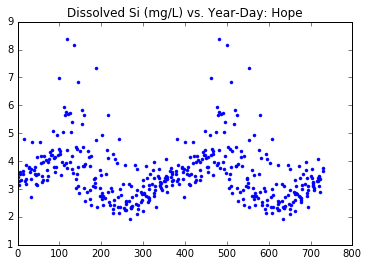

In [22]:
# Si at Hope
data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(or_(Profs.variable_name=='SILICA DISSOLVED',
                      Profs.variable_name=='SILICON DISSOLVED')).filter(
                Profs.station_name=='Fraser River at Hope').all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.plot(YD+365.0,Amm,'b.')
plt.title('Dissolved Si (mg/L) vs. Year-Day: Hope')

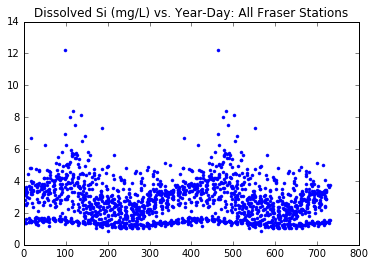

In [23]:
## Si, all Fraser Stations:
data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(or_(Profs.variable_name=='SILICA DISSOLVED',
                      Profs.variable_name=='SILICON DISSOLVED')).filter(
                Profs.station_name.like('Fraser River%')).all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.plot(YD+365.0,Amm,'b.')
plt.title('Dissolved Si (mg/L) vs. Year-Day: All Fraser Stations')

In [24]:
data=session.query(Profs.station_name, func.avg(Profs.value)).\
            filter(or_(Profs.variable_name=='SILICA DISSOLVED',
                      Profs.variable_name=='SILICON DISSOLVED')).\
            group_by(Profs.station_name).all()
for row in data:
    print(row)

('Fraser River (Main Arm) at Gravesend Reach - Buoy', 2.3121428571428573)
('Fraser River at Hansard', 2.6484293193717274)
('Fraser River at Hope', 3.569227272727273)
('Fraser River at Marguerite', 3.338653846153846)
('Fraser River at Red Pass', 1.3941250000000003)
('Nechako River at Prince George', 2.984513274336285)
('North Alouette River at 132nd Ave and Edge Street', 1.388)
('Salmon River at Highway 1 Bridge', 11.404579831932779)
('South Thompson River at Kamloops', 2.93)
('Thompson River at Spences Bridge', 2.87617924528302)


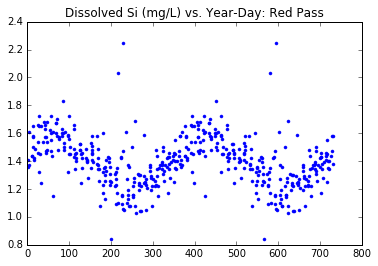

In [25]:
# Si at Red Pass
data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(or_(Profs.variable_name=='SILICA DISSOLVED',
                      Profs.variable_name=='SILICON DISSOLVED')).filter(
                Profs.station_name=='Fraser River at Red Pass').all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.plot(YD+365.0,Amm,'b.')
plt.title('Dissolved Si (mg/L) vs. Year-Day: Red Pass')

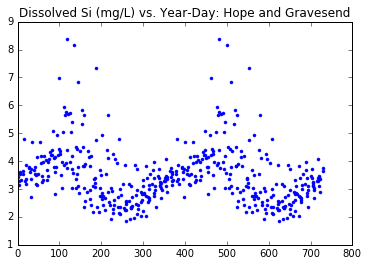

In [26]:
# Si at Hope or Gravesend
data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(or_(Profs.variable_name=='SILICA DISSOLVED',
                      Profs.variable_name=='SILICON DISSOLVED')).filter(
                  or_(
                    Profs.station_name.like('%Hope%'),
                    Profs.station_name.like('%Gravesend%'))).all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.plot(YD+365.0,Amm,'b.')
plt.title('Dissolved Si (mg/L) vs. Year-Day: Hope and Gravesend')

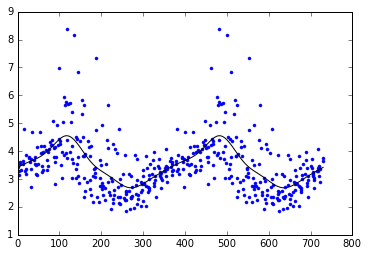

In [27]:
allt=np.arange(0,366)
fil=np.empty(np.size(allt))
L=50
s=L/2.355
for t in allt:
    diff=[min(abs(x-t),abs(x-t+365), abs(x-t-365)) for x in YD]
    weight=[np.exp(-.5*x**2/s**2) if x <= 3*L else 0.0 for x in diff]
    #weight=[np.exp(-.5*x**2/s**2) for x in diff]
    fil[t]=np.sum(weight*Amm)/np.sum(weight)
plt.plot(YD,Amm,'b.')
plt.plot(YD+365.0,Amm,'b.')
plt.plot(allt,fil,'k-')
plt.plot(allt+365,fil,'k-')
#plt.plot(YD,weight,'*')

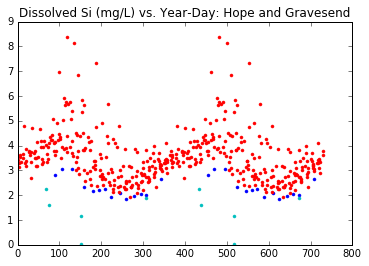

In [28]:
# show Si at Hope, Gravesend, and Alouette

data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(or_(Profs.variable_name=='SILICA DISSOLVED',
                      Profs.variable_name=='SILICON DISSOLVED')).filter(
                    Profs.station_name.like('%Gravesend%')).all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.plot(YD+365.0,Amm,'b.')
plt.title('Dissolved Si (mg/L) vs. Year-Day: Hope and Gravesend')

data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(or_(Profs.variable_name=='SILICA DISSOLVED',
                      Profs.variable_name=='SILICON DISSOLVED')).filter(
                    Profs.station_name.like('%Hope%')).all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'r.')
plt.plot(YD+365.0,Amm,'r.')

data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value).\
            filter(or_(Profs.variable_name=='SILICA DISSOLVED',
                      Profs.variable_name=='SILICON DISSOLVED')).filter(
                    Profs.station_name.like('%Alouette%')).all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0 in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'c.')
plt.plot(YD+365.0,Amm,'c.')

In [ ]:
'NITROGEN DISSOLVED ORGANIC (CALCD.)',)
('NITROGEN NITRITE',)
('NITROGEN TOTAL',)
('NITROGEN TOTAL DISSOLVED',)
('NITROGEN TOTAL KJELDAHL',)
('NITROGEN TOTAL ORGANIC (CALCD.)',)

Dissolved 0.24 MG/L
Dissolved 0.24 MG/L
Total 0.24 MG/L


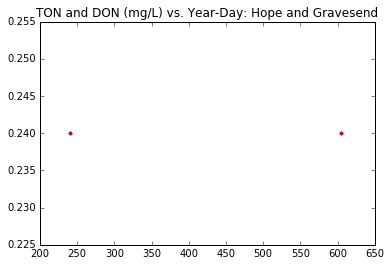

In [34]:
# DON at Hope or Gravesend
data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value, Profs.unit_code).\
            filter(Profs.variable_name=='NITROGEN DISSOLVED ORGANIC (CALCD.)'
                      ).filter(
                  or_(
                    Profs.station_name.like('%Hope%'),
                    Profs.station_name.like('%Gravesend%'))).all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0, u in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
    print('Dissolved',Amm0, u)
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'b.')
plt.plot(YD+365.0,Amm,'b.')
plt.title('DON (mg/L) vs. Year-Day: Hope and Gravesend')

# TON at Hope or Gravesend
data=session.query(Profs.Year, Profs.Month, Profs.Day, Profs.value, Profs.unit_code).\
            filter(Profs.variable_name=='NITROGEN TOTAL ORGANIC (CALCD.)'
                      ).filter(
                  or_(
                    Profs.station_name.like('%Hope%'),
                    Profs.station_name.like('%Gravesend%'))).all()
Y=[]
M=[]
D=[]
Amm=[]
date=[]
for Y0, M0, D0, Amm0, u in data:
    Y.append(Y0)
    M.append(M0)
    D.append(D0)
    Amm.append(Amm0)
    date.append(dt.date(Y0,M0,D0))
    print('Total',Amm0, u)
Y=np.array(Y)
M=np.array(M)
D=np.array(D)
Amm=np.array(Amm)
date=np.array(date)
YD=0.0*Y
for i in range(0,len(Y)):
    YD[i]=date[i].timetuple().tm_yday
plt.plot(YD,Amm,'r.')
plt.plot(YD+365.0,Amm,'r.')
plt.title('TON and DON (mg/L) vs. Year-Day: Hope and Gravesend')

In [12]:
session.close()
engine.dispose()